# Clustering

We'll work with the online shoppers purchase intention dataset located in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

To obtain the data, check the folder `prepare-data` in this repo, or section 2 in the course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Prepare data

In [2]:
df = pd.read_csv("../online_shoppers.csv")

print(df.shape)

df.head()

(12330, 20)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Returning_Visitor,VisitorType_New_Visitor,Month_sin,Month_cos
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,-0.427872,0.410621,-0.399087,1.281289,0.553785
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,-0.427872,0.410621,-0.399087,1.281289,0.553785
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.550552,-0.427872,0.410621,-0.399087,1.281289,0.553785
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.550552,-0.427872,0.410621,-0.399087,1.281289,0.553785
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1.816360,-0.427872,0.410621,-0.399087,1.281289,0.553785


In [3]:
# select observations at random

idx = df.sample(int(0.7*len(df)), random_state=19).index

len(idx)

8631

In [4]:
# split data

X_train = df.iloc[idx]
X_test = df.loc[~df.index.isin(idx)]

X_train.shape, X_test.shape

((8631, 20), (3699, 20))

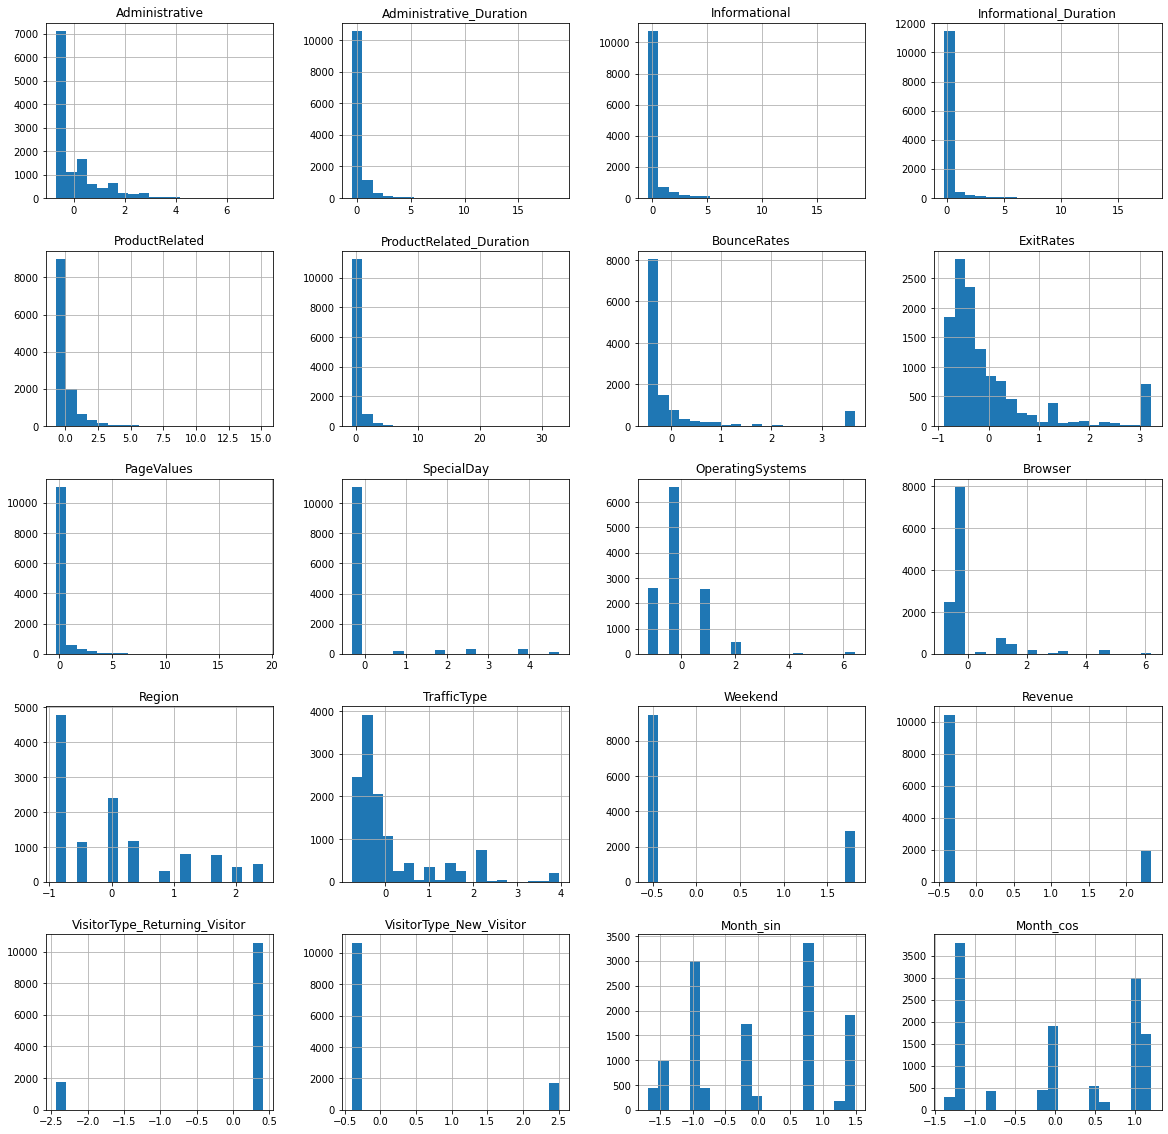

In [5]:
df.hist(bins=20, figsize=(20, 20))
plt.show()

## K-means clustering

Code taken from [Stackoverflow](https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion)

### Optimal number of clusters with Elbow method

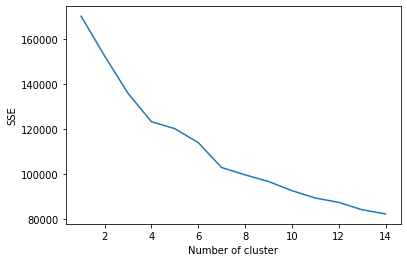

In [6]:
sse = {}
for k in range(1, 15):
    
    # cluster
    kmeans = KMeans(
        n_clusters=k,
        max_iter=1000, 
        n_init="auto",
        random_state=19,
    ).fit(X_train)
    
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

According to the elbow method, we could cluster the data into 6-7 clusters.

### Optimal number of clusters with Silhouette Coefficient

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [7]:
for k in range(2, 11):

    # cluster
    kmeans = KMeans(
        n_clusters=k,
        max_iter=1000,
        n_init="auto",
        random_state=19,
    ).fit(X_train)

    label = kmeans.labels_

    sil_coeff = silhouette_score(X_train, label, metric='euclidean')

    print(f"For n_clusters={k}, The Silhouette Coefficient is {sil_coeff}")

For n_clusters=2, The Silhouette Coefficient is 0.21118455169974987
For n_clusters=3, The Silhouette Coefficient is 0.22101823533707485
For n_clusters=4, The Silhouette Coefficient is 0.22715624918267424
For n_clusters=5, The Silhouette Coefficient is 0.12862962125631855
For n_clusters=6, The Silhouette Coefficient is 0.13158913332384573
For n_clusters=7, The Silhouette Coefficient is 0.1472184362923302
For n_clusters=8, The Silhouette Coefficient is 0.14114733846567262
For n_clusters=9, The Silhouette Coefficient is 0.14564481942537397
For n_clusters=10, The Silhouette Coefficient is 0.14888110799651424


According to the Silhouette Coefficient, the optimal number of cluster seems to be around 7.

### Train KMeans

In [8]:
kmeans = KMeans(
    n_clusters=7,
    max_iter=1000, 
    n_init="auto",
    random_state=19,
).fit(X_train)
    
c_train = kmeans.labels_
c_test = kmeans.predict(X_test)

In [9]:
pd.Series(c_train).value_counts(normalize=True)

0    0.275518
1    0.271463
2    0.127795
5    0.103812
4    0.080871
3    0.073224
6    0.067315
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

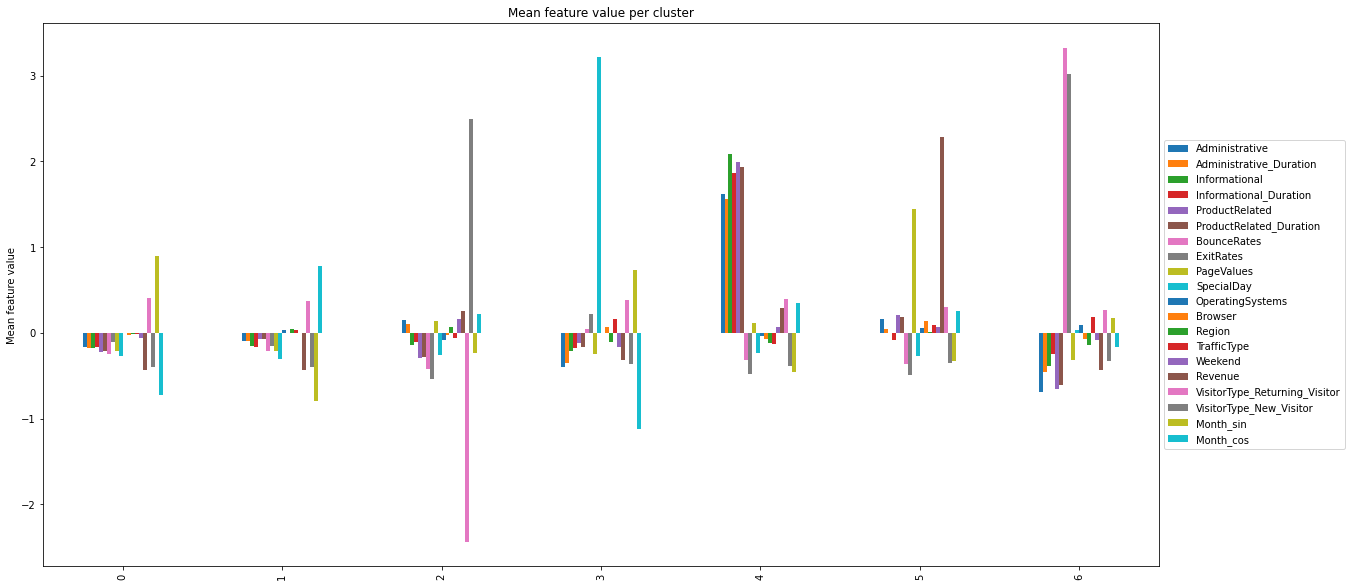

In [10]:
s = X_test.groupby(c_test).mean()
s.plot.bar(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Mean feature value per cluster")
plt.ylabel("Mean feature value")
plt.show

**Cluster 2** is characterized for large negative value of returning visitor (that's not returning visitor), and large positive value of new visitor, which makes sense.

**Cluster 3** is characterized by large positive value of Special Day, that is customers that show up on a special day, and relatively large negative value of month cos, which we would have to re-construct to understand which month it represents.

**Cluster 4** seems to show high values for the first 5 features in the data (`Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration')`.

**Cluster 5** shows large values of `PageValues` and `Revenue`, so this cluster contains customers that make a purchase. That's one cluster that we could be interested to explore in more detail, to learn what makes a customer buy.

**Cluster 6** shows large values of BounceRates and ExitRates, so those are the customers that land on our website and leave it almost immediately.

Without knowing much about the data or going into detail into the meaning of each variable, we found some meaningul characteristics for some of the clusters.

## Decision tree for interpretation

Let's now see if using a decision tree as a surrogate helps us understand more about the clusters.

In [11]:
# Train a surrogate to predict the cluster
# to which an observation will be allocated

surrogate = DecisionTreeClassifier(random_state=0)

surrogate.fit(X_train, c_train)

DecisionTreeClassifier(random_state=0)

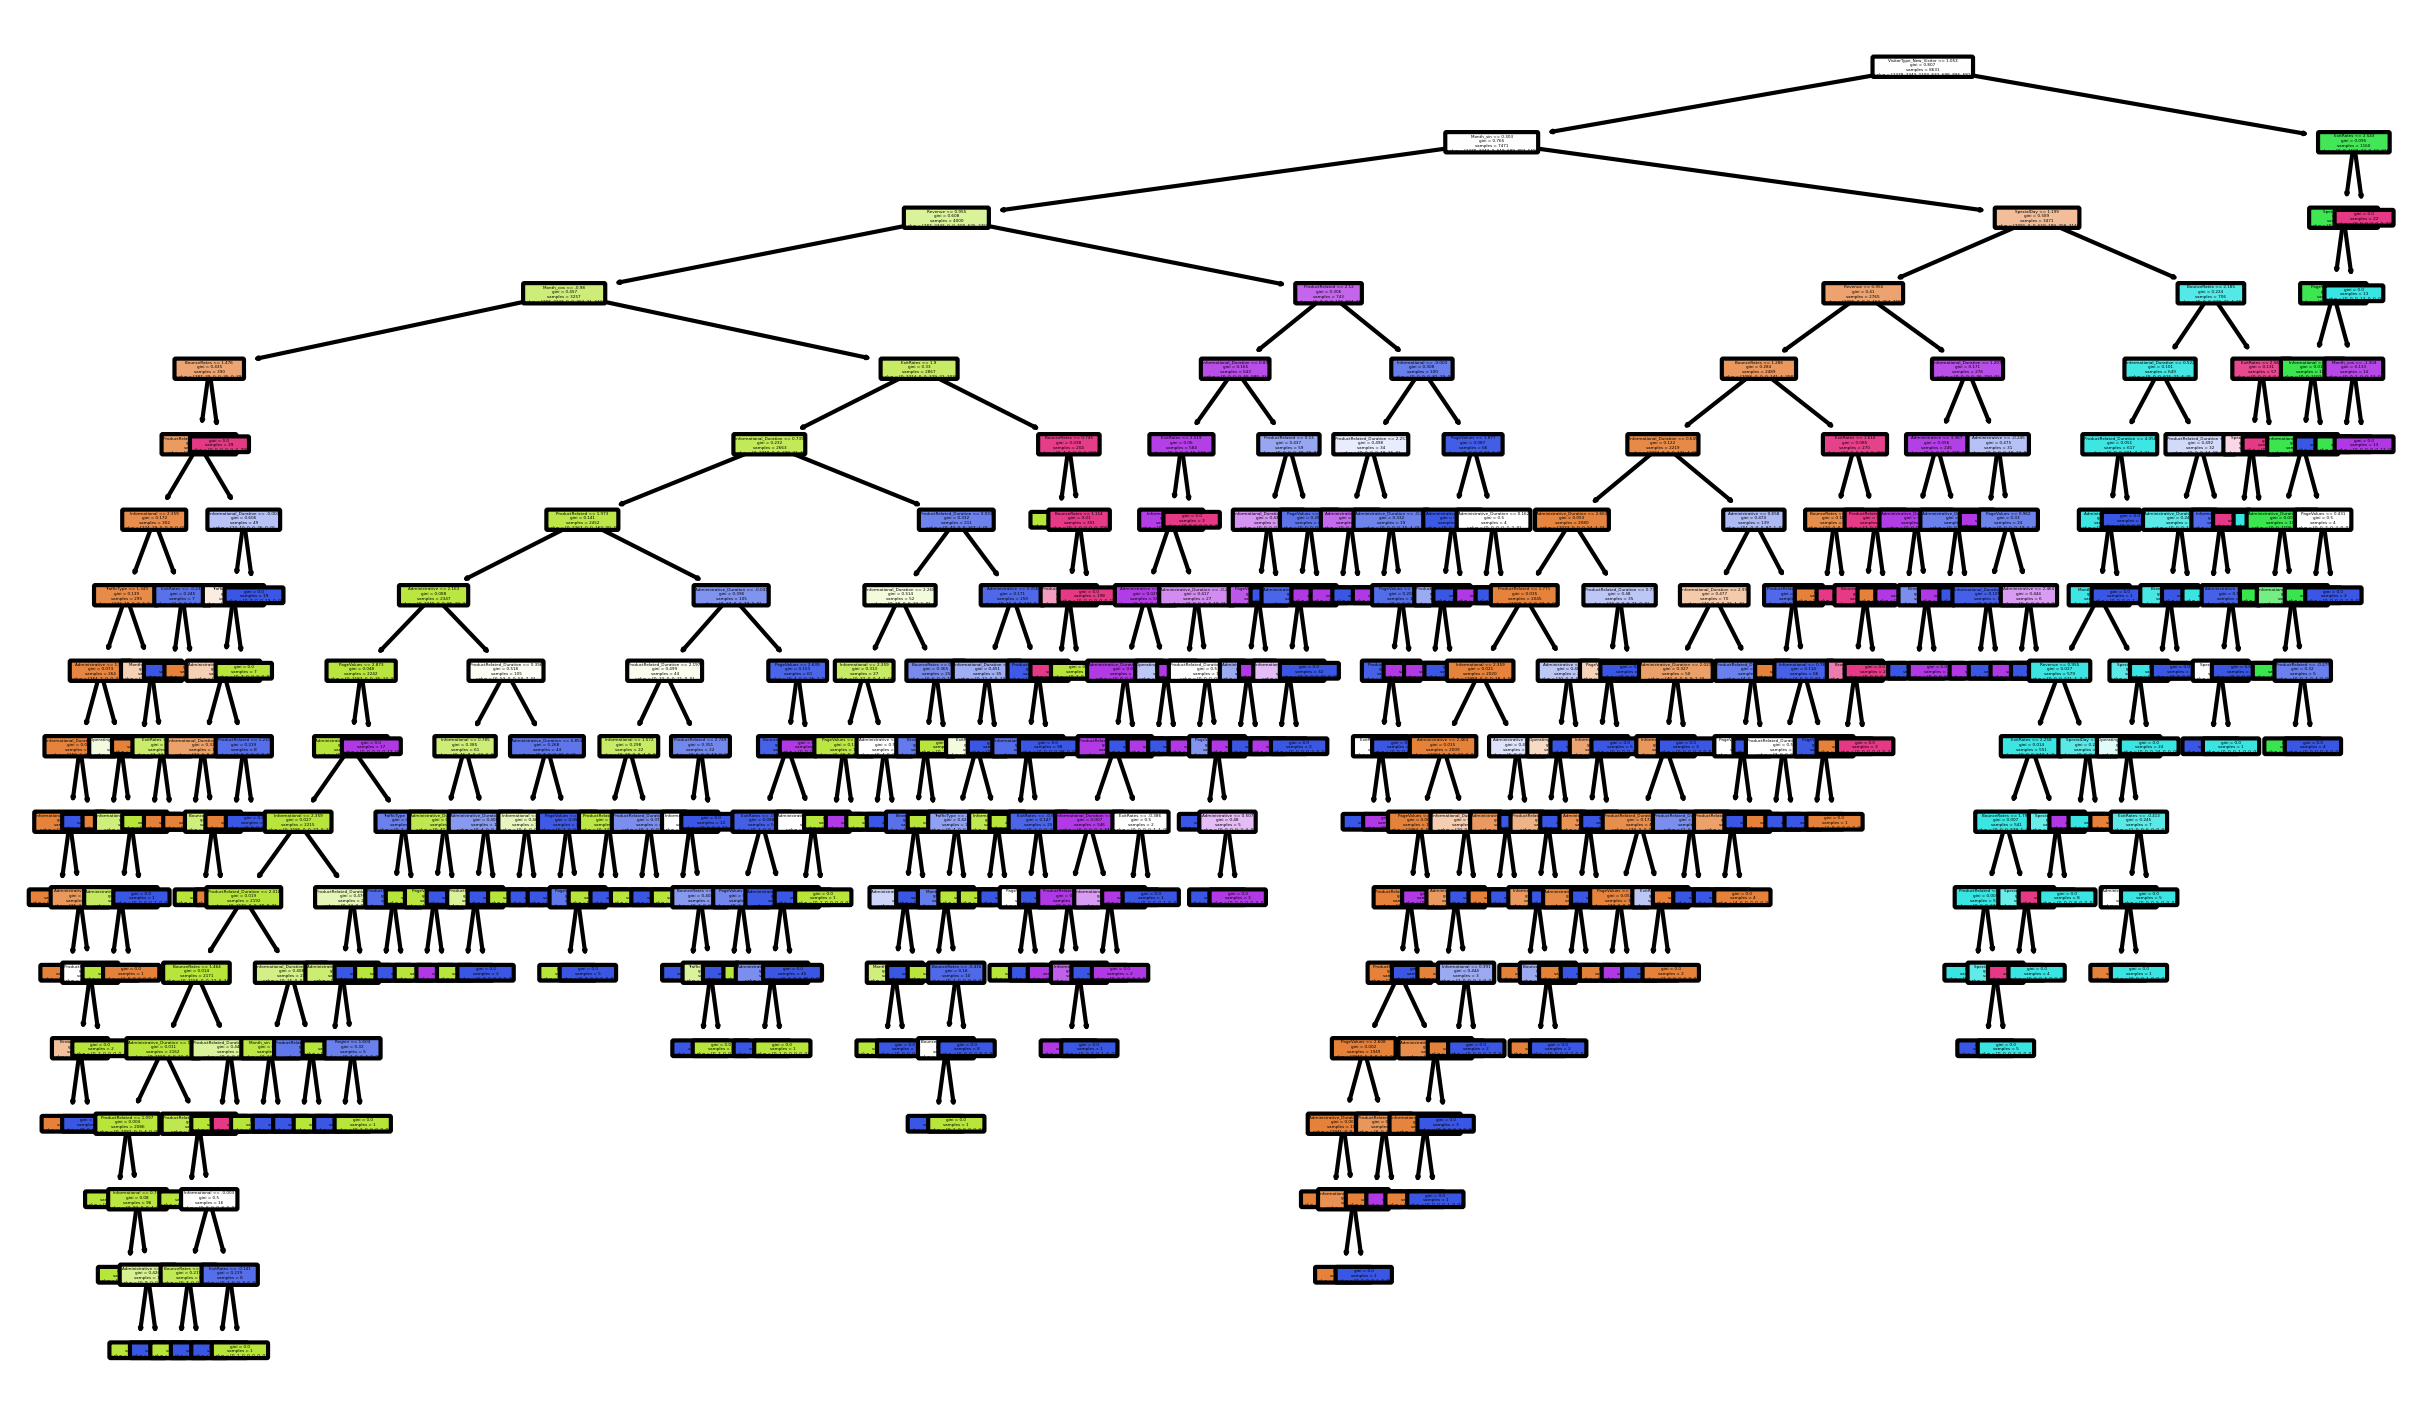

In [12]:
plt.figure(figsize=(10, 6), dpi=300)

plot_tree(
    decision_tree = surrogate,
    feature_names=X_train.columns.to_list(),
    filled=True, # color the squares
    rounded=True # round squares
)

plt.show()

Alright, this is what I call a **not interpretable** interpretable model. 

Let's try again and control the depth of the tree.

In [13]:
# Train a surrogate to predict the cluster
# to which an observation will be allocated

surrogate = DecisionTreeClassifier(max_depth=4, random_state=0)

surrogate.fit(X_train, c_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

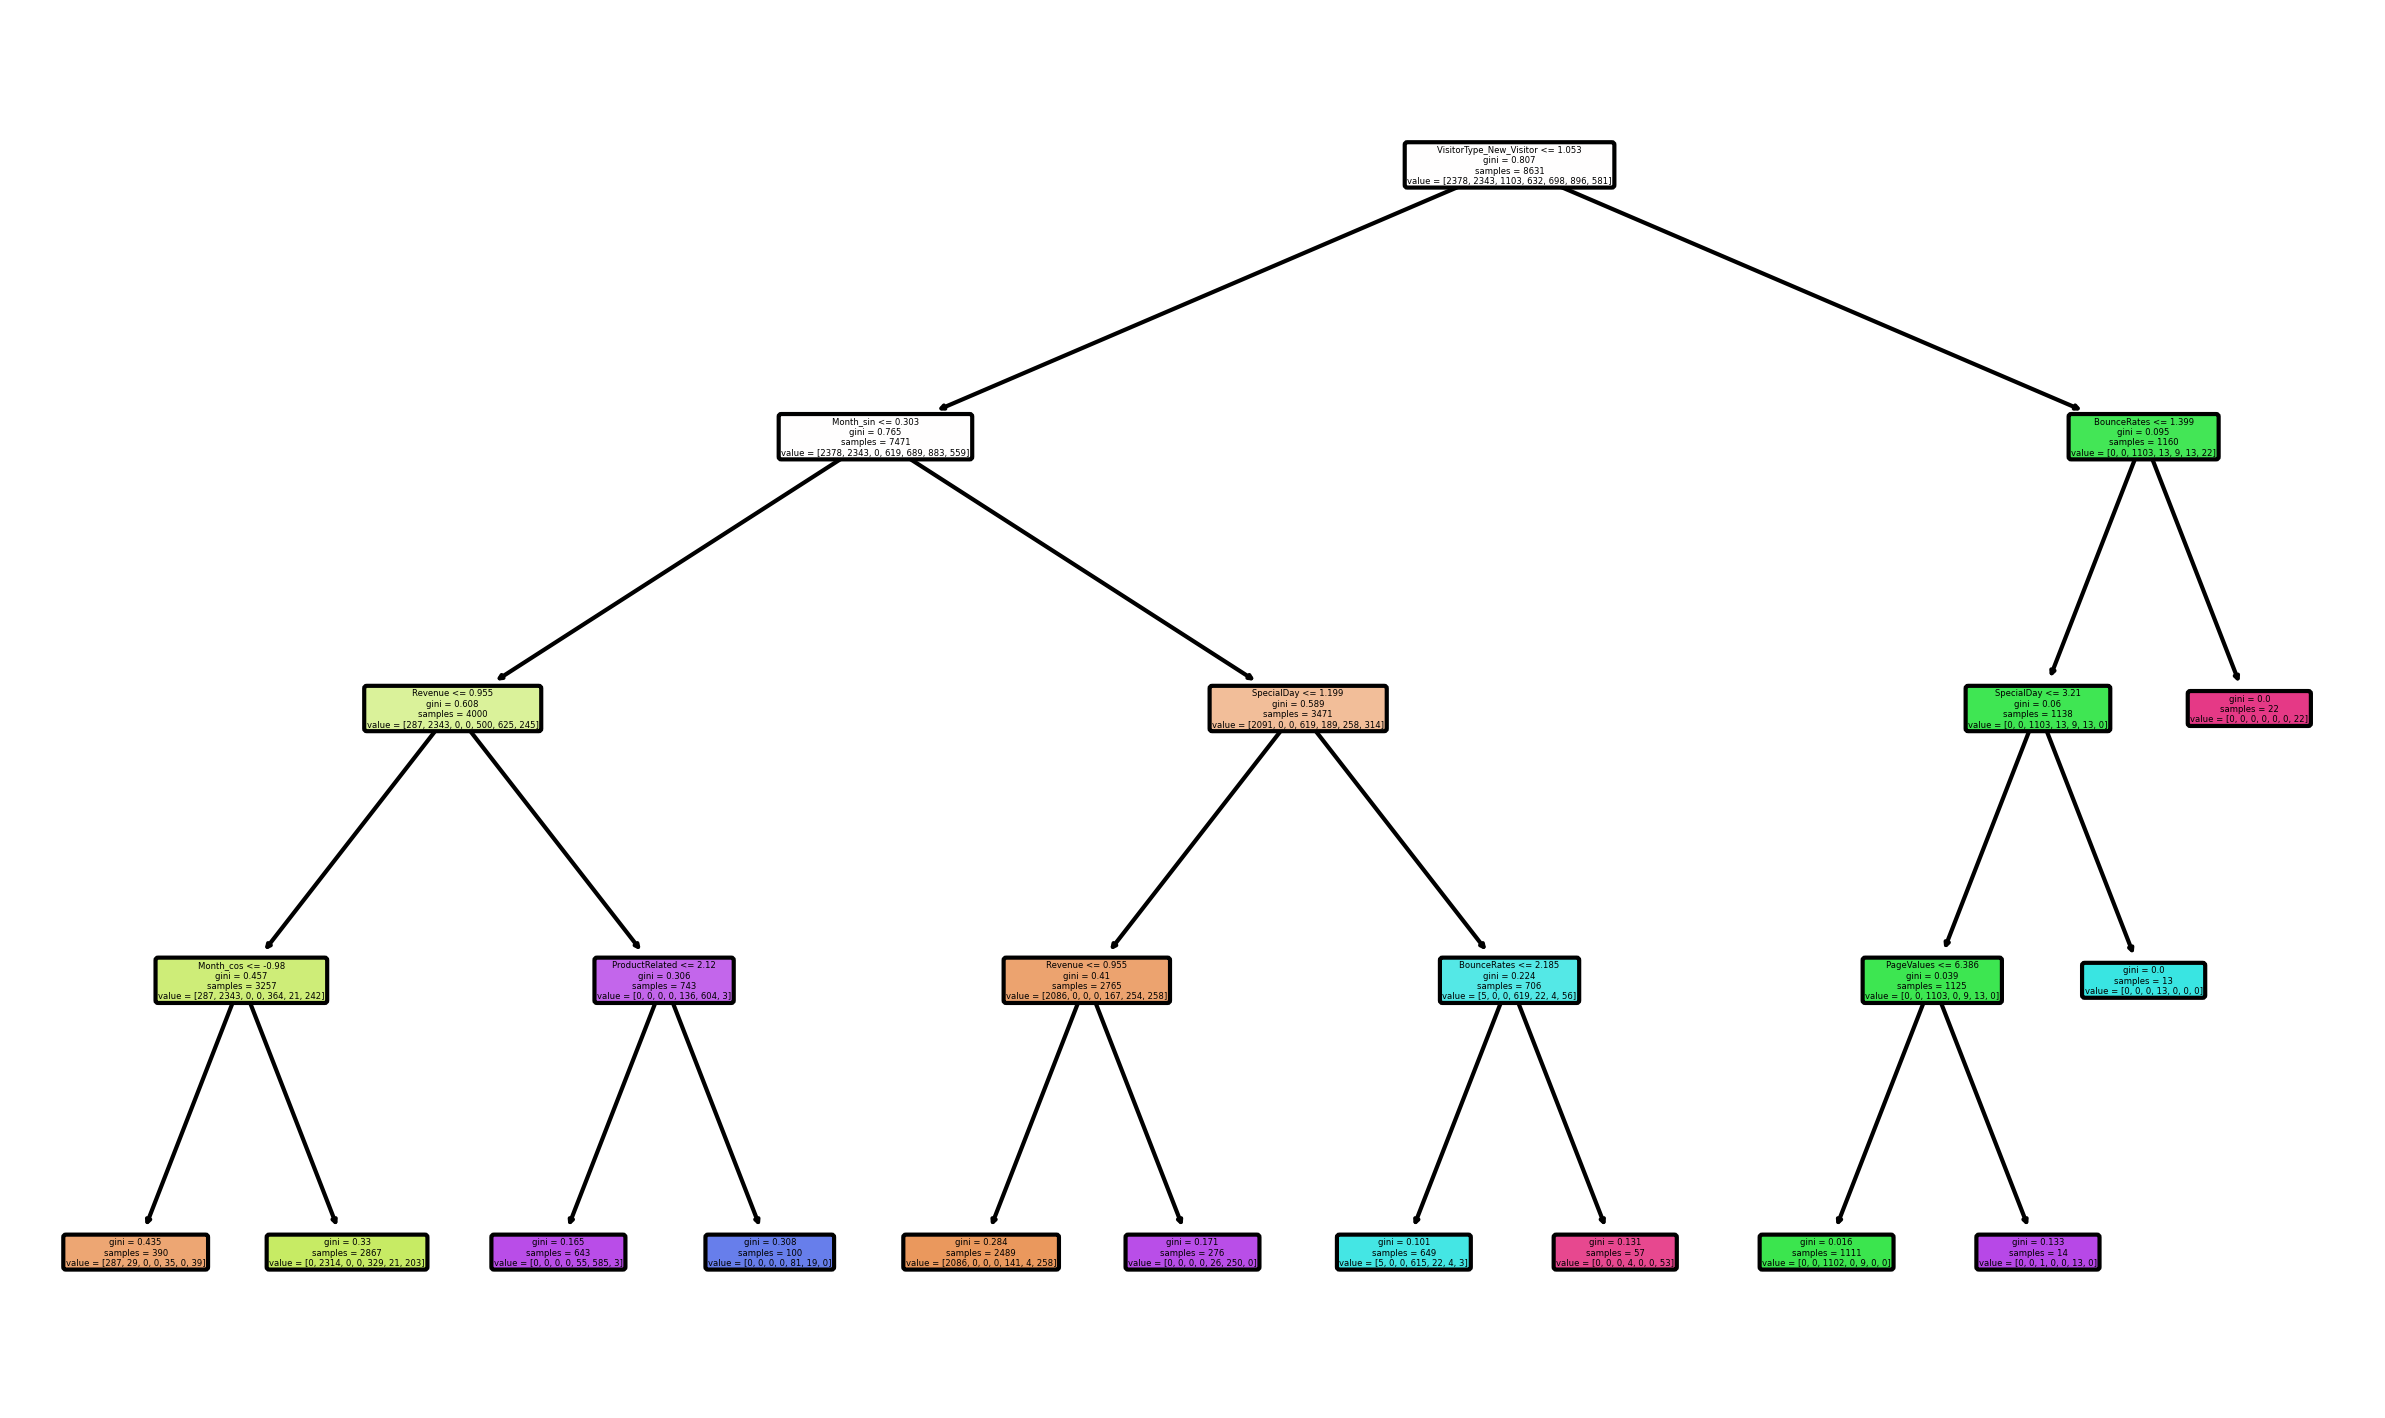

In [14]:
plt.figure(figsize=(10, 6), dpi=300)

plot_tree(
    decision_tree = surrogate,
    feature_names=X_train.columns.to_list(),
    filled=True, # color the squares
    rounded=True, # round squares
)
plt.savefig('surrogate', dpi=300)
plt.show()

In [15]:
print(f"Accuracy in train set: {accuracy_score(c_train, surrogate.predict(X_train))}")
print(f"Accuracy in test set: {accuracy_score(c_test, surrogate.predict(X_test))}")

Accuracy in train set: 0.8598076700266482
Accuracy in test set: 0.851581508515815


The tree has very good accuracy. We have an imbalanced target, there are very few observations allocated to clusters 4-5. 

Let's try the balanced accuracy instead.

In [16]:
from sklearn.metrics import balanced_accuracy_score as ba

print(f"Accuracy in train set: {ba(c_train, surrogate.predict(X_train))}")
print(f"Accuracy in test set: {ba(c_test, surrogate.predict(X_test))}")

Accuracy in train set: 0.7385495089789745
Accuracy in test set: 0.7333398903284726


As expected, the balanced accuracy is lower, which suggests that the surrogate is not doing very well for the minority clusters.

Then what? 

Try to improve the performance of the model for all clusters with some imbalanced data methods like cost sensitive learning.

## Global explanations

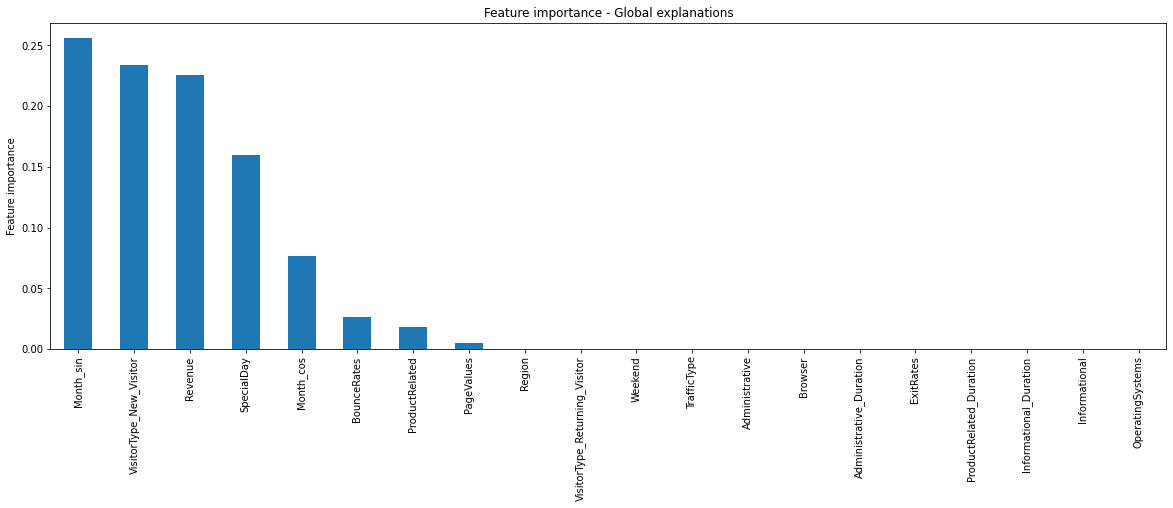

In [17]:
global_exp = pd.Series(
    surrogate.feature_importances_,
    index=surrogate.feature_names_in_)

global_exp.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

There are mainly 6-7 features driving the allocation to the different clusters. And as we can see, they are almost the same that we used to characterize the different clusters a couple of cells ago. So far, so good.

We see that `BounceRate` is important, but `ExitRate` is not, although both characterize the last cluster. It is likely that they are correlated.

So now what?

There are a few things that come to mind to improve the fidelity of the surrogate to the clustering algorithm.

- First, we could look for and remove correlated features. 
- Then, I'd re-clusterize the data. 
- Then train a tree, optimizing it with cross-validation
- If the accuracy is low, try to improve performance with cost-sensitive learning, or oversampling.



## Local explanations

For local explanations in multi-class we need to treat each class as 1 vs rest. What makes things more complicated. But what can we do right?

In a 1-vs-rest approach, we use the surrogate to explain why an observation was allocated to a certain cluster, or not allocated to a certain other cluster.

In [18]:
from treeinterpreter import treeinterpreter as ti

In [19]:
c_test[0:20]

array([0, 0, 3, 0, 3, 6, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 6, 3, 3, 0])

### Examine first observation

In [20]:
# obtain data for first observation

prediction, bias, contributions = ti.predict(surrogate, X_test.head(1))

In [21]:
# for observation 1, the probability of being allocated to each cluster

prediction[0]

array([0.83808759, 0.        , 0.        , 0.        , 0.05664926,
       0.00160707, 0.10365609])

The highest probability for this sample is to belong to the first cluster.

In [22]:
# contributions towards being allocated in cluster 0

c = contributions[0][:,0]

c

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15201033,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08365721, 0.        , 0.04277894, 0.28412264, 0.        ])

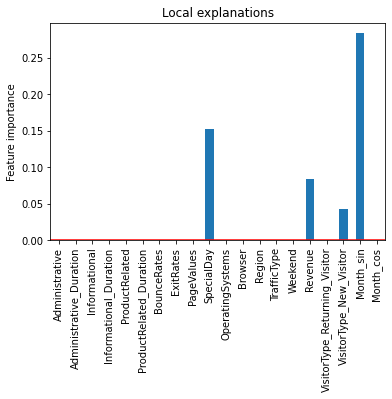

In [23]:
pd.Series(c, index=X_train.columns).plot.bar()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Feature importance")
plt.title("Local explanations")
plt.show()

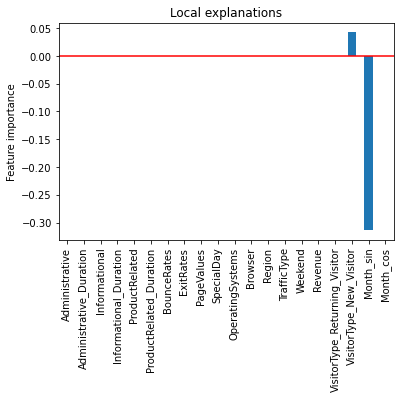

In [24]:
# contributions towards not being allocated in cluster 1

c = contributions[0][:,1]

pd.Series(c, index=X_train.columns).plot.bar()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Feature importance")
plt.title("Local explanations")
plt.show()

### Examine all observations

In [25]:
prediction, bias, contributions = ti.predict(surrogate, X_test)

In [26]:
prediction

array([[0.83808759, 0.        , 0.        , ..., 0.05664926, 0.00160707,
        0.10365609],
       [0.83808759, 0.        , 0.        , ..., 0.05664926, 0.00160707,
        0.10365609],
       [0.00770416, 0.        , 0.        , ..., 0.03389831, 0.00616333,
        0.0046225 ],
       ...,
       [0.        , 0.80711545, 0.        , ..., 0.1147541 , 0.00732473,
        0.07080572],
       [0.        , 0.80711545, 0.        , ..., 0.1147541 , 0.00732473,
        0.07080572],
       [0.        , 0.80711545, 0.        , ..., 0.1147541 , 0.00732473,
        0.07080572]])

In [27]:
prediction[2]

array([0.00770416, 0.        , 0.        , 0.94761171, 0.03389831,
       0.00616333, 0.0046225 ])

This observation was allocated to cluster 3.

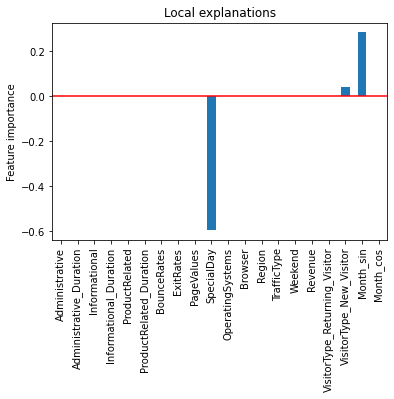

In [28]:
# let's examine the contribution of NOT being allocated to cluster 0

c = contributions[2][:,0]

pd.Series(c, index=X_train.columns).plot.bar()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Feature importance")
plt.title("Local explanations")
plt.show()

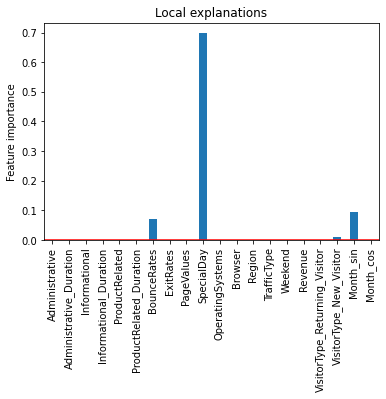

In [29]:
# let's examine the contribution of being allocated to cluster 3
c = contributions[2][:,3]

pd.Series(c, index=X_train.columns).plot.bar()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Feature importance")
plt.title("Local explanations")
plt.show()

We can now provide some explanations about why an observation is allocated to one or the other cluster.